<a href="https://colab.research.google.com/github/simonrio23/UASKecerdasanBuatan/blob/main/KelompokAcawala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/canccontent/drive/MyDrive/UASKecerdasanBuatan/Acawala/dataset/Coimbra_breast_er_dataset run.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# import the libraries:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# read the data:

file_path = ('/content/drive/MyDrive/UASKecerdasanBuatan/Acawala/dataset/Coimbra_breast_cancer_dataset run.csv')
df = pd.read_csv(file_path)

In [ ]:
# view the data:

df.head(10)

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   54  35.207389      103    5.642  1.378660  65.6699     9.738408  31.17499   
1   52  22.978520      132    6.054  1.145435  47.5445     3.627241  23.03327   
2   32  21.101341       87    5.668  1.008595  50.5074     5.067841   9.51156   
3   42  26.761205      132    2.875  1.003837  16.8972    10.096475   9.75652   
4   55  34.232520       76    3.120  1.597721  17.6852    11.845054  17.21541   
5   47  26.643220      136    3.375  4.516214  29.4842    10.356278   5.59087   
6   32  20.950698      134    4.174  1.094998  10.3516    15.931240   5.28237   
7   53  23.788202      131    4.718  1.305201  18.5883     6.694044  15.77810   
8   57  32.469138       76    4.407  0.798422  31.6023     7.929650   4.51991   
9   83  29.149505       76    4.216  1.440923  15.1333     8.588777   6.91304   

     MCP.1  Classification  
0  197.660               1  
1  423.361               2  
2  897.034               2  
3  267.744               1  
4  788.552               2  
5  354.180               1  
6  331.533               2  
7  415.305               1  
8  585.515               2  
9  209.636               1

In [ ]:
# take a copy of the data:

cdf = df.copy()
# check for null data:

cdf.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [ ]:
# check for duplecates data:

cdf.duplicated().sum()


0

In [ ]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             999 non-null    int64  
 1   BMI             999 non-null    float64
 2   Glucose         999 non-null    int64  
 3   Insulin         999 non-null    float64
 4   HOMA            999 non-null    float64
 5   Leptin          999 non-null    float64
 6   Adiponectin     999 non-null    float64
 7   Resistin        999 non-null    float64
 8   MCP.1           999 non-null    float64
 9   Classification  999 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 78.2 KB


In [ ]:
cdf.describe().transpose()

count        mean         std         min         25%  \
Age             999.0   56.250250   18.059172   32.000000   38.000000   
BMI             999.0   27.673015    4.562668   20.700543   23.061649   
Glucose         999.0  115.223223   25.451184   76.000000   80.000000   
Insulin         999.0    8.759032    6.640147    2.822000    4.373500   
HOMA            999.0    1.975479    1.620079    0.592898    0.950985   
Leptin          999.0   25.825331   15.160683    6.831900   12.866000   
Adiponectin     999.0    9.326959    4.782365    3.192272    5.518515   
Resistin        999.0   12.914566    7.487480    4.191610    6.873125   
MCP.1           999.0  524.082317  254.790478  140.140000  312.816000   
Classification  999.0    1.587588    0.492515    1.000000    1.000000   

                       50%         75%          max  
Age              56.000000   72.000000    85.000000  
BMI              27.690460   31.236266    36.207789  
Glucose         132.000000  135.000000   138.000000  
Insulin           5.810000   10.472500    30.211000  
HOMA              1.331805    2.348963     8.206551  
Leptin           21.778500   37.820300    68.506600  
Adiponectin       8.184336   10.958595    22.536919  
Resistin         10.561830   17.302755    42.531800  
MCP.1           490.277000  698.611000  1227.250000  
Classification    2.000000    2.000000     2.000000

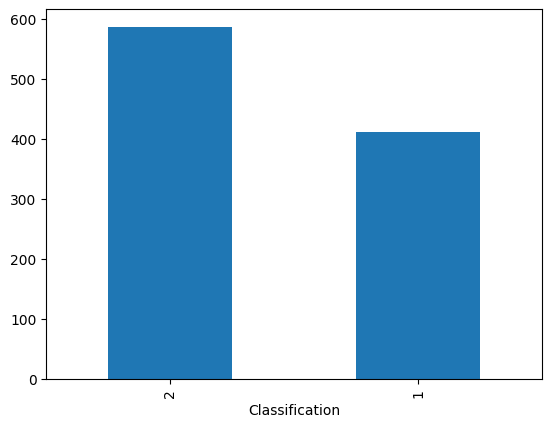

In [ ]:
# check the target column:

cdf['Classification'].value_counts().plot(kind='bar')
plt.show()

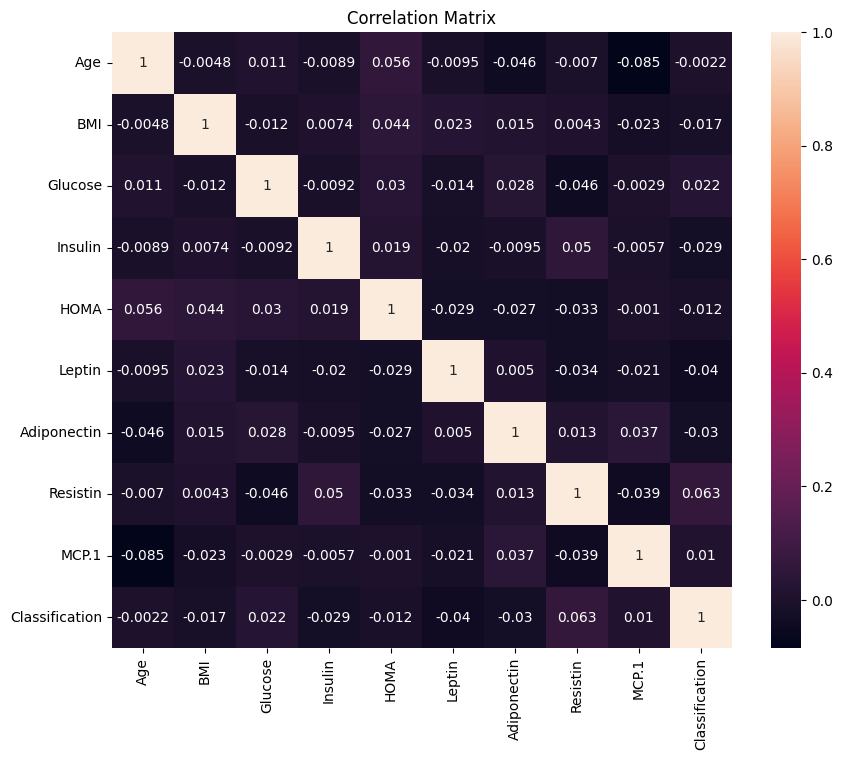

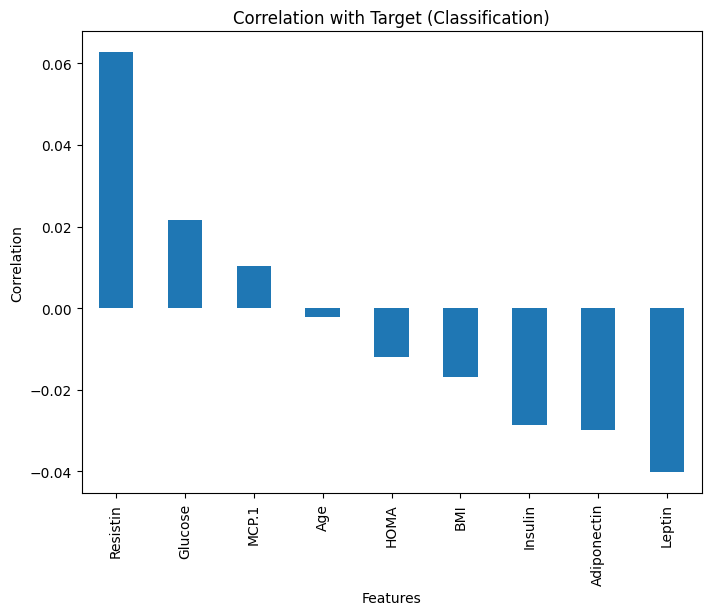

In [ ]:
# check for the correlation of the data

corr_matrix = cdf.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Visualize the correlation of features with the target column
correlation_with_target = df.corr()['Classification'].sort_values(ascending=False)

# Remove correlation with itself
correlation_with_target = correlation_with_target.drop('Classification')

plt.figure(figsize=(8, 6))
correlation_with_target.plot(kind='bar')
plt.title('Correlation with Target (Classification)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

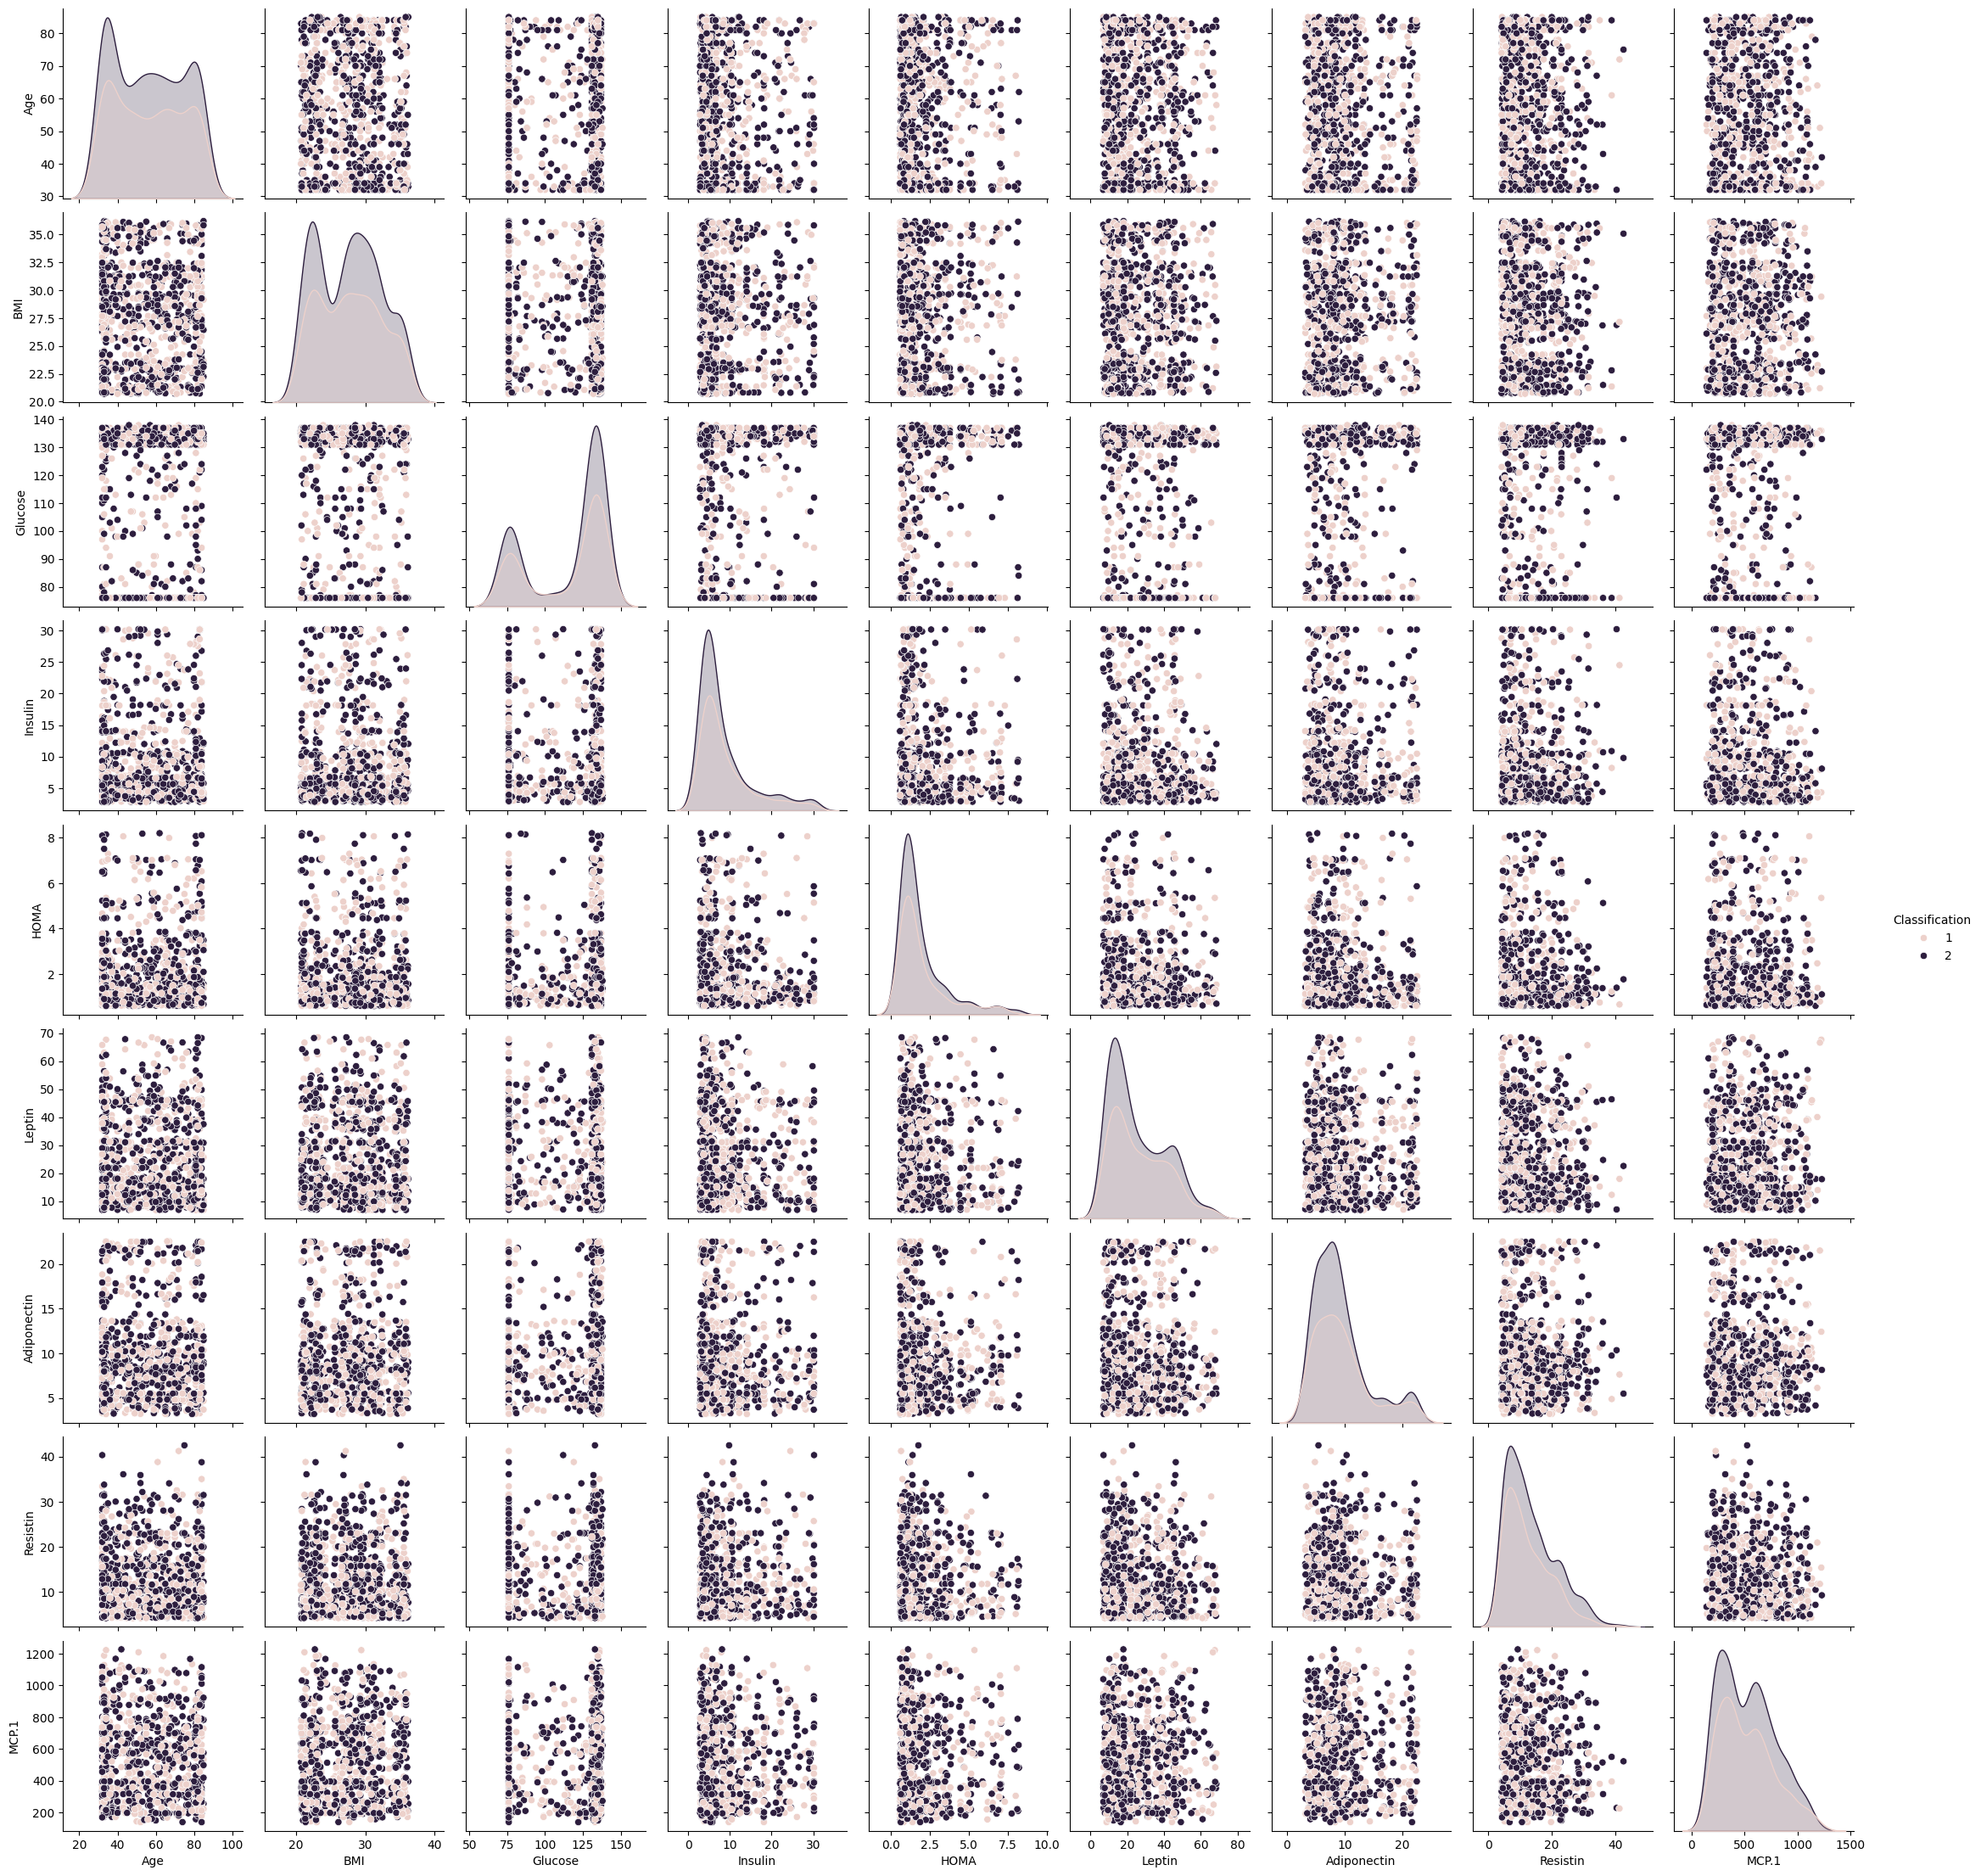

In [ ]:
sns.pairplot(cdf,hue='Classification')
plt.show()

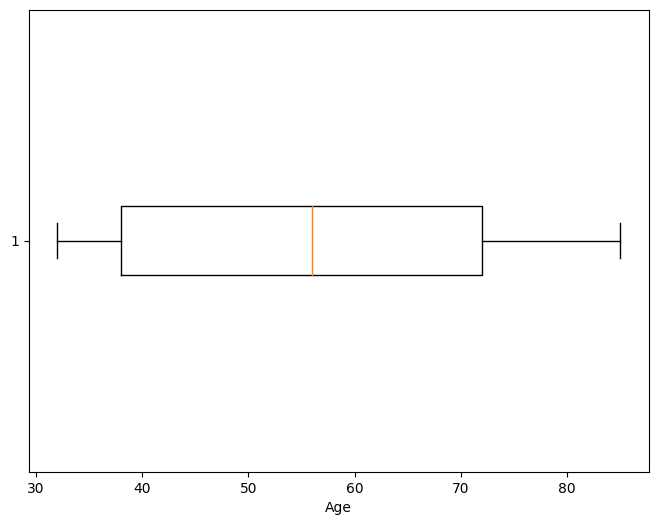

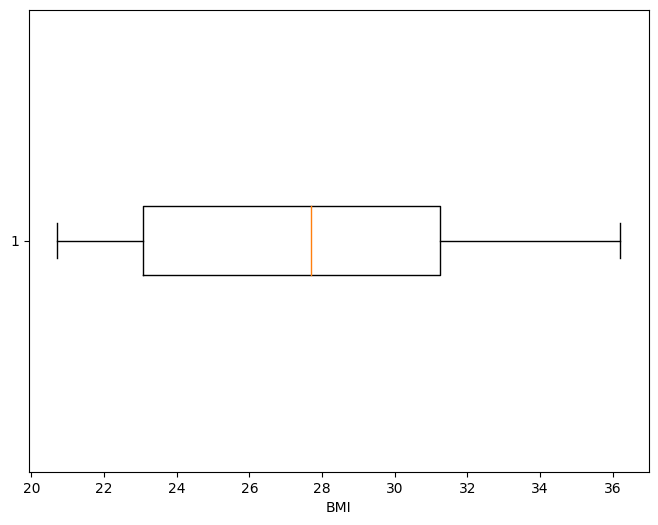

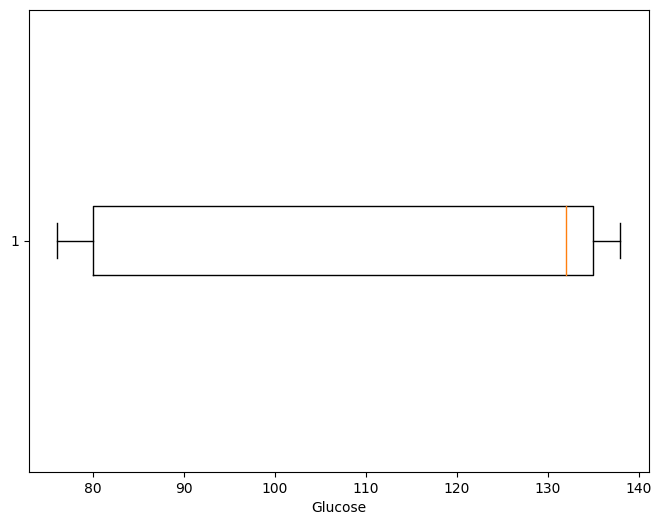

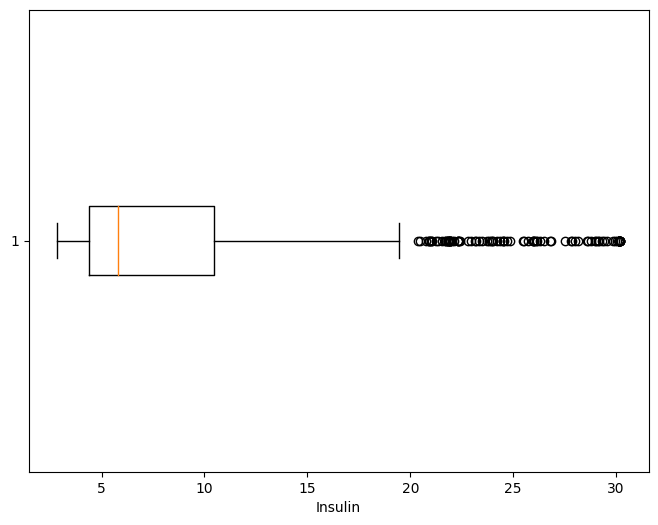

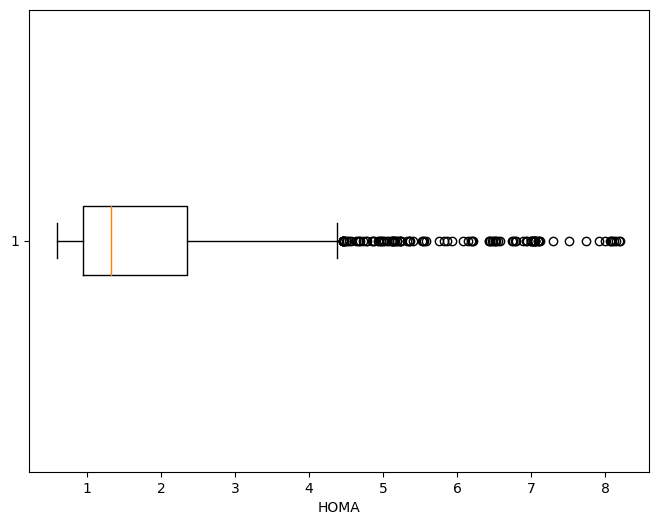

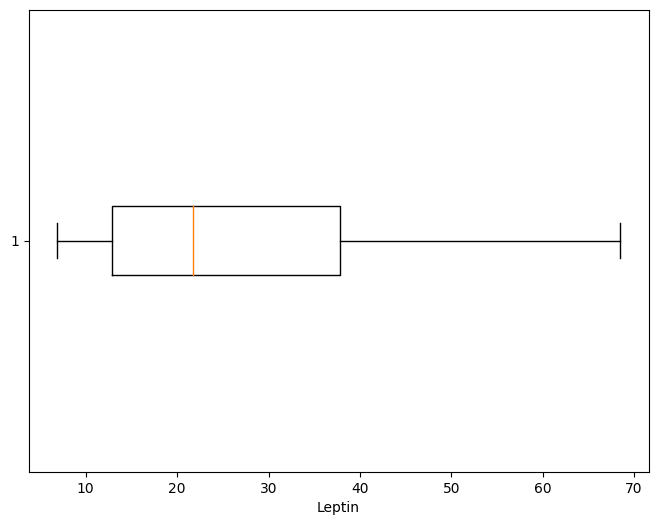

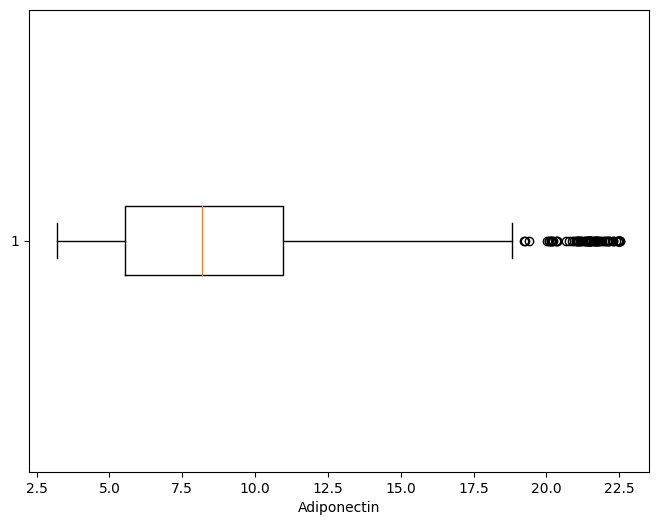

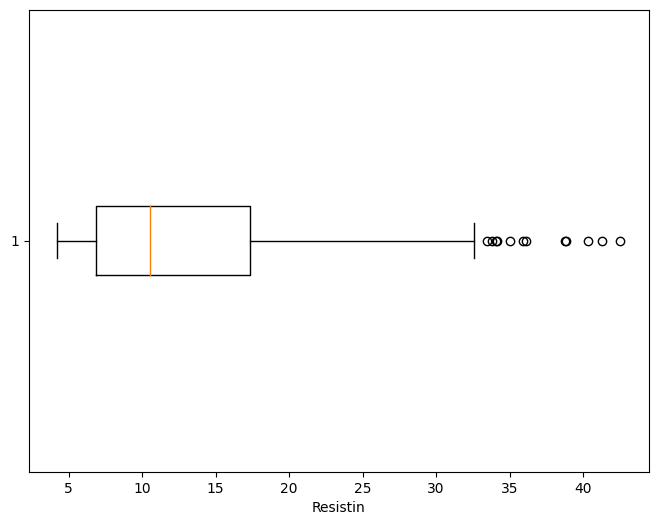

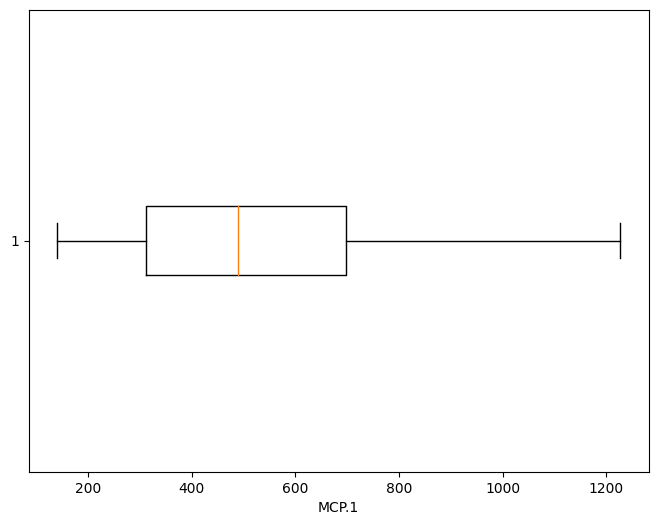

In [ ]:
for col in cdf:
    if col == 'Classification':
        continue
    plt.figure(figsize=(8,6))
    plt.boxplot(cdf[col],vert=False)
    plt.xlabel(col)
    plt.show()


In [ ]:
cdf['Classification'] = cdf['Classification'].replace({1: 0, 2: 1})

x = cdf.drop('Classification',axis=1)
y = cdf['Classification']

In [ ]:
model = DecisionTreeClassifier()

model.fit(x,y)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
       Feature  Importance
1          BMI    0.149189
7     Resistin    0.142369
6  Adiponectin    0.118202
3      Insulin    0.111140
5       Leptin    0.109694
0          Age    0.107904
8        MCP.1    0.104187
4         HOMA    0.087597
2      Glucose    0.069718


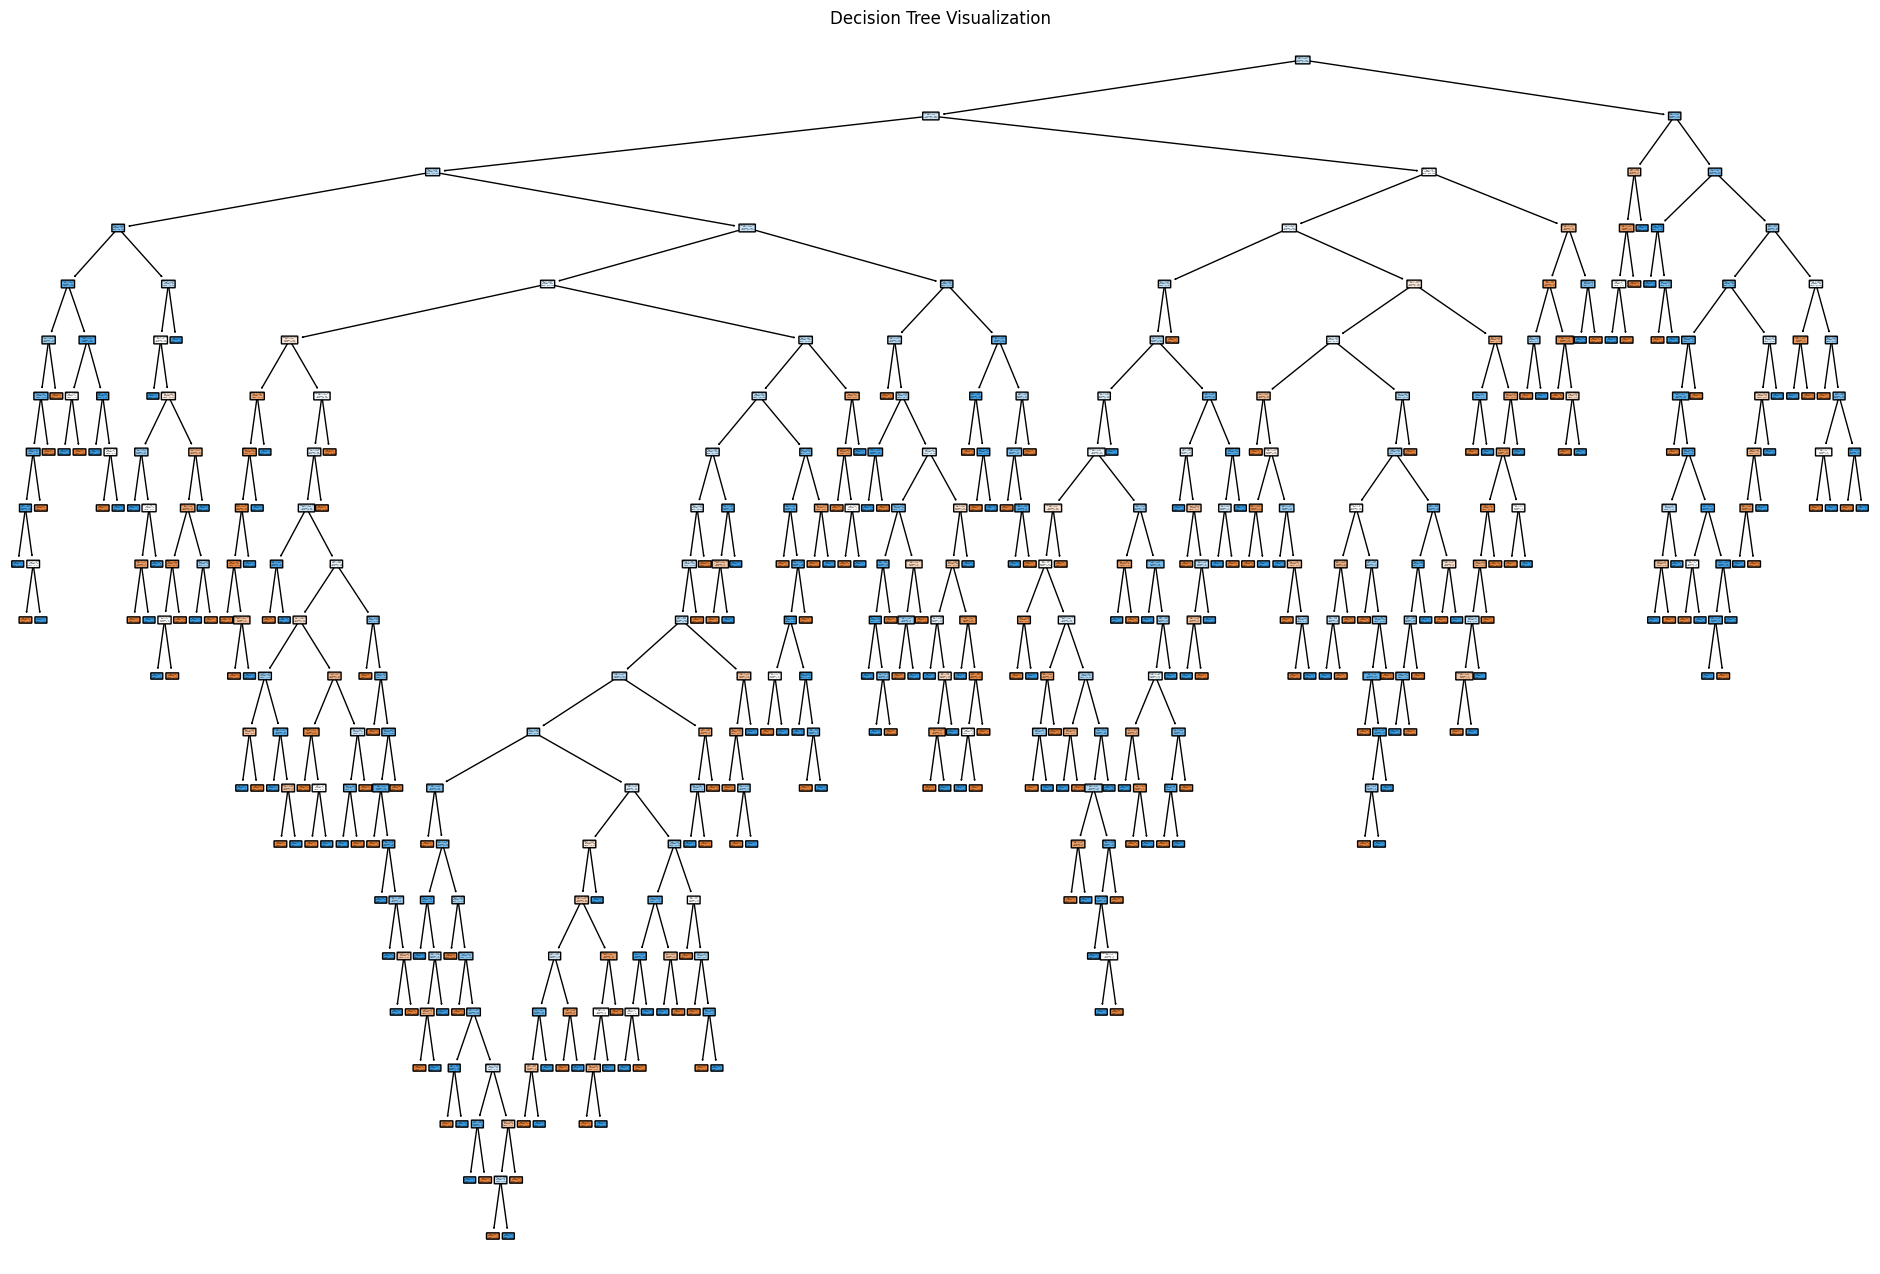

In [ ]:
# Visualize the Decision Tree

from sklearn.tree import plot_tree

plt.figure(figsize=(24, 16))
plot_tree(model, feature_names=x.columns, class_names=['Negative', 'Positive'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)

Model: LogisticRegression
Precision: 0.6021
ROC AUC: 0.5042
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.05      0.09        80
           1       0.60      0.96      0.74       120

    accuracy                           0.59       200
   macro avg       0.52      0.50      0.41       200
weighted avg       0.54      0.59      0.48       200



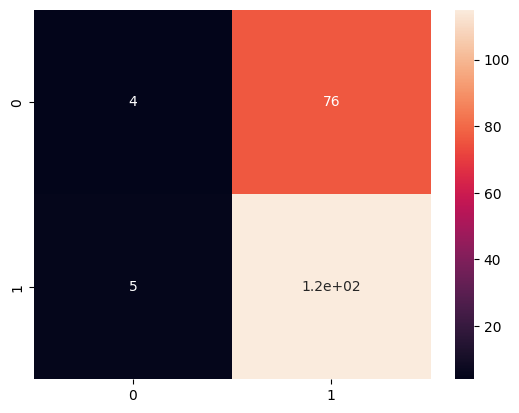

<Figure size 1500x800 with 0 Axes>

----------------------------------------------------------------------------------------------------
Model: DecisionTreeClassifier
Precision: 0.6061
ROC AUC: 0.5083
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.35      0.38        80
           1       0.61      0.67      0.63       120

    accuracy                           0.54       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.53      0.54      0.53       200



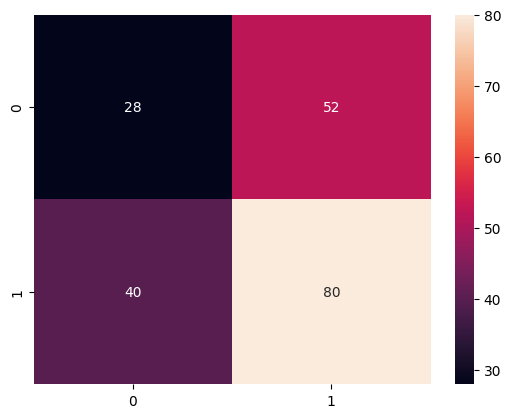

<Figure size 1500x800 with 0 Axes>

----------------------------------------------------------------------------------------------------
Model: RandomForestClassifier
Precision: 0.6387
ROC AUC: 0.5625
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.30      0.38        80
           1       0.64      0.82      0.72       120

    accuracy                           0.61       200
   macro avg       0.59      0.56      0.55       200
weighted avg       0.60      0.61      0.59       200



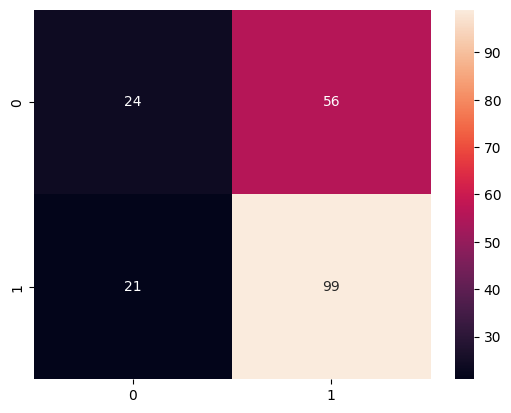

<Figure size 1500x800 with 0 Axes>

----------------------------------------------------------------------------------------------------
Model: XGBClassifier
Precision: 0.6720
ROC AUC: 0.5938
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.50        80
           1       0.67      0.70      0.69       120

    accuracy                           0.61       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.61      0.61      0.61       200



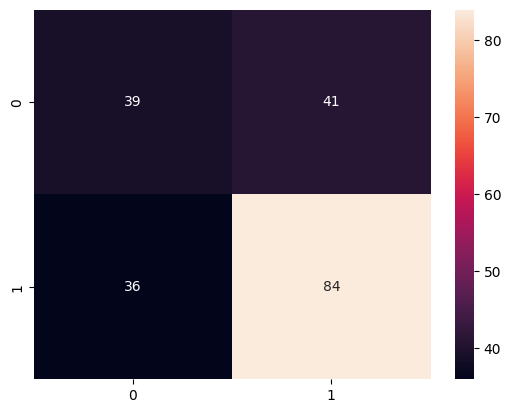

<Figure size 1500x800 with 0 Axes>

----------------------------------------------------------------------------------------------------
Model: KNeighborsClassifier
Precision: 0.5940
ROC AUC: 0.4917
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.33      0.35        80
           1       0.59      0.66      0.62       120

    accuracy                           0.53       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.51      0.53      0.52       200



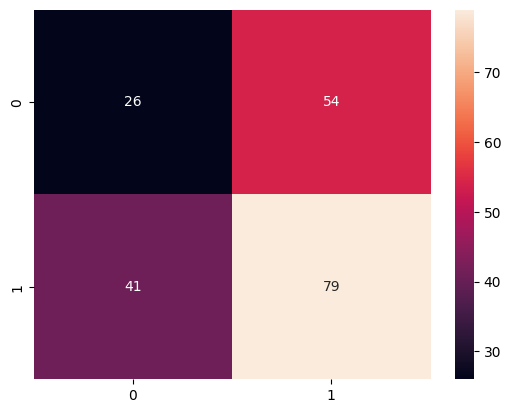

<Figure size 1500x800 with 0 Axes>

----------------------------------------------------------------------------------------------------
Model: SVC
Precision: 0.5968
ROC AUC: 0.4938
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.06      0.11        80
           1       0.60      0.93      0.73       120

    accuracy                           0.58       200
   macro avg       0.48      0.49      0.42       200
weighted avg       0.50      0.58      0.48       200



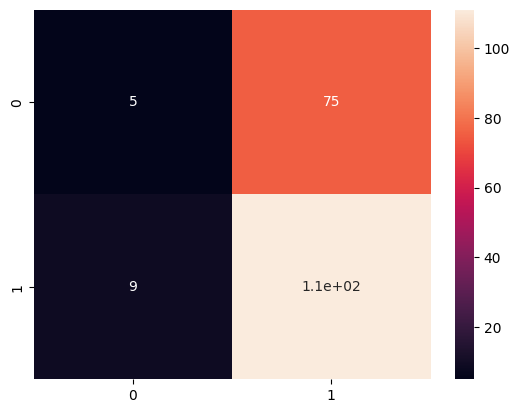

<Figure size 1500x800 with 0 Axes>

----------------------------------------------------------------------------------------------------


In [ ]:
# Create four model objects
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    KNeighborsClassifier(),
    SVC(random_state=42)
]

# Train and evaluate each model
for model in models:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

# Calculate evaluation metrics
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print results for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Precision: {precision:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{report}")
    sns.heatmap(cm,annot=True)
    plt.figure(figsize=(15,8))
    plt.show()
    print("-" * 100)


In [ ]:
model = KNeighborsClassifier()

grid_param = {
    'n_neighbors': [6],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute','auto'],
    'p': [1,2,3,4,5]
}

grid_search = GridSearchCV(model,grid_param,cv=5,scoring='roc_auc')
grid_search.fit(x_train_scaled,y_train)

best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict_proba(x_test_scaled)[:,1]

search_params = grid_search.best_params_
roc_scor = roc_auc_score(y_test,y_pred)

print(best_estimator)

print(search_params)
print(roc_scor)

print('+-'*50)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, p=4,
                     weights='distance')
{'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 4, 'weights': 'distance'}
0.5230208333333333
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


In [ ]:
model = KNeighborsClassifier(
    n_neighbors = 7,
    weights = 'distance',
    algorithm = 'ball_tree',
    p=1
)
model.fit(x_train_scaled,y_train)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7, p=1,
                     weights='distance')

In [ ]:
y_pred = model.predict(x_test_scaled)

roc_scor = roc_auc_score(y_test,y_pred)
print(roc_scor)

0.51875


In [ ]:
correlations = pd.DataFrame(x_train_scaled).corrwith(y_train)
sorted_correlations = correlations.sort_values(ascending=False)
print("Feature Correlations:\n")
print(sorted_correlations)

Feature Correlations:

Resistin       0.087510
BMI            0.074811
Glucose        0.055417
Insulin        0.033944
MCP.1          0.011456
Adiponectin    0.009800
Age           -0.004434
Leptin        -0.044493
HOMA          -0.061879
dtype: float64


In [ ]:
pca = PCA()
pca.fit(x_train_scaled)

x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

for n_components in [1,2, 3, 4, 5, 6, 7, 8, 9]:
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    # Train the KNN model with the transformed data
    model = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='ball_tree', p=1)
    model.fit(x_train_pca, y_train)
    y_pred = model.predict(x_test_pca)

    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC Score with {n_components} components: {roc_auc:.4f}")

ROC AUC Score with 1 components: 0.5396
ROC AUC Score with 2 components: 0.5229
ROC AUC Score with 3 components: 0.5167
ROC AUC Score with 4 components: 0.4625
ROC AUC Score with 5 components: 0.4417
ROC AUC Score with 6 components: 0.4667
ROC AUC Score with 7 components: 0.5042
ROC AUC Score with 8 components: 0.5167
ROC AUC Score with 9 components: 0.4979


In [ ]:

pca = PCA(n_components=8)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

model = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='ball_tree', p=1)
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score with 8 components: {roc_auc:.4f}")

ROC AUC Score with 8 components: 0.5167
